<a href="https://colab.research.google.com/github/zaidkhajah/Zaid/blob/master/Game_Of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
""" Object Oriented Programming implementation of the game of life
    Reference to:
    1. http://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/
    for the examples at the end
    2. https://en.wikipedia.org/wiki/Conway's_Game_of_Life
    for the rules of the game

    We need to animate the plotting to have a neater lookin output.
    we may add also the game of life on the surface of a 3d object"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [0]:
class Universe():
  """The universe of the game of life"""
  def __init__(self, nr, nc, x_search, y_search):
    self.nrow = nr
    self.ncol = nc
    self.x_search = x_search
    self.y_search = y_search
    self.matrix = np.random.choice( [ True , False ], ( self.nrow , self.ncol ) )
    self.survive = np.array([ 2 , 3 ])
    self.birth = np.array([ 3 ])

  def manualseed( self, matrix ):
    self.matrix = matrix
    self.nrow = len(matrix[:, 1])
    self.ncol = len(matrix[1, :])
  def show( self ):
    plt.imshow(self.matrix)
    plt.colorbar()
    plt.pause(0.05)
    plt.show()

  def check_adjacent( self , i , j ):
    living_neighbors = 0
    for k in range(-self.x_search, self.x_search + 1):
      for l in range(-self.y_search, self.y_search + 1):
        if (i + k < self.nrow) and (j + l < self.ncol) and (( k , l ) != ( 0 , 0 )) and (i + k >= 0) and ((j + l) >= 0):
          living_neighbors += self.matrix[ i + k , j + l ]
    return living_neighbors

  def cfuture( self , status , living_neighbors ):
    if status == 0:
      if living_neighbors in self.birth:
       status = 1
    elif status == 1:
      if not living_neighbors in self.survive:
        status = 0
    return status

  def ufuture( self ):
    new = np.zeros((self.nrow, self.ncol))
    for i in range(self.nrow):
      for j in range(self.ncol):
        living_neighbors = self.check_adjacent( i , j )
        status = self.matrix[ i , j ]
        new[i, j] = self.cfuture( status , living_neighbors )
    self.matrix = new

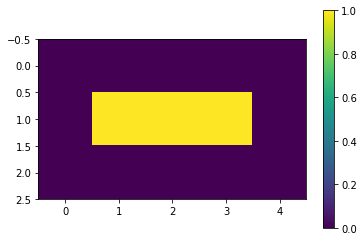

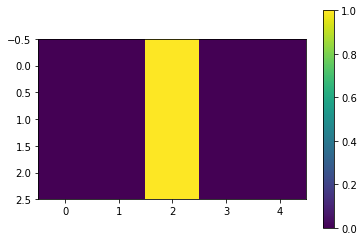

In [52]:
# Blinker
%matplotlib inline
number_of_time_steps = 20
universe = Universe(10, 10, 1, 1)
m = np.array([[0, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 0]])
universe.manualseed(m)
universe.show()
universe.ufuture()
universe.show()

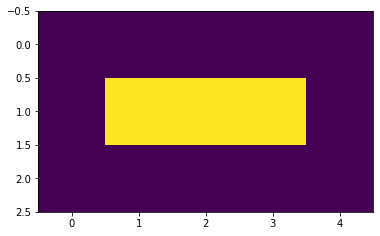

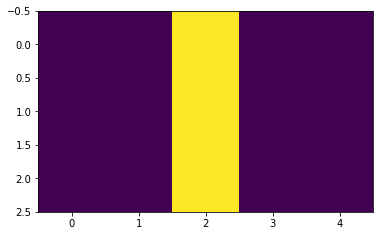

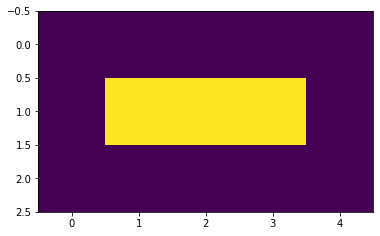

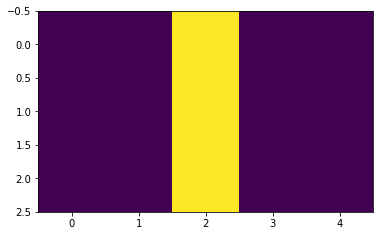

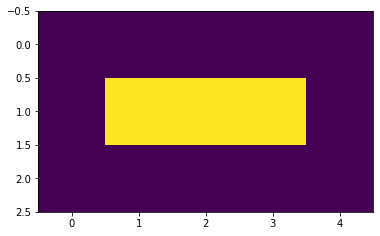

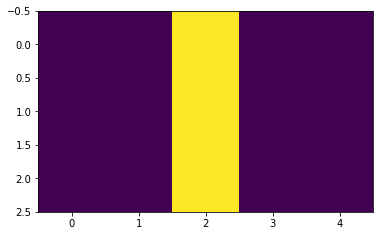

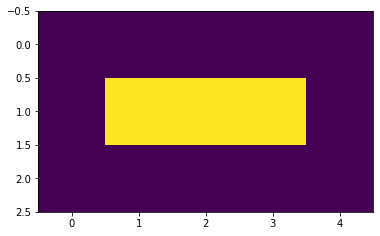

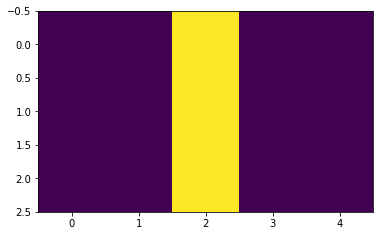

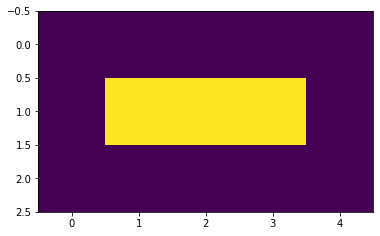

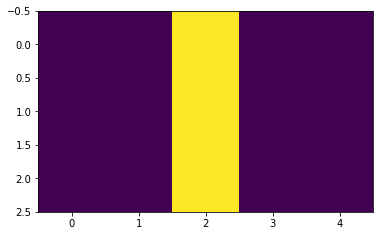

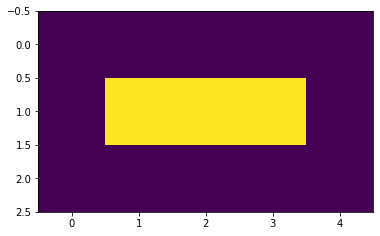

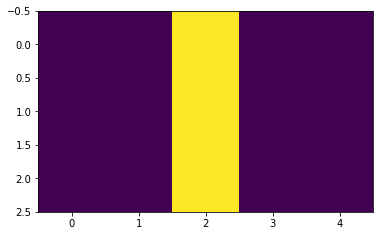

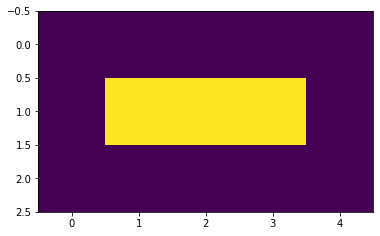

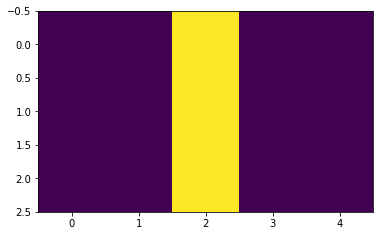

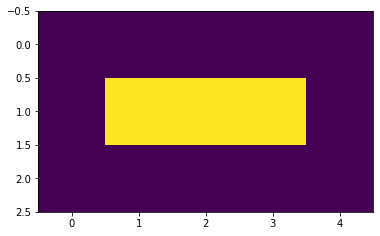

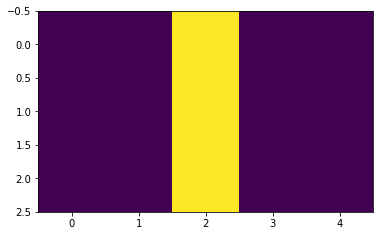

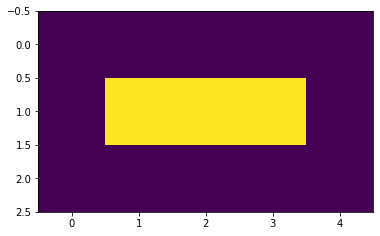

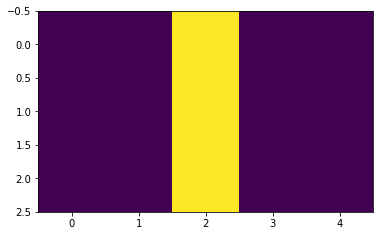

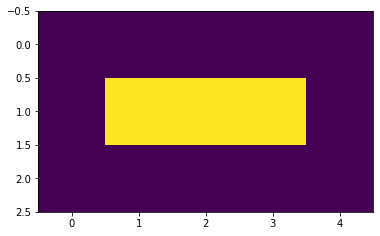

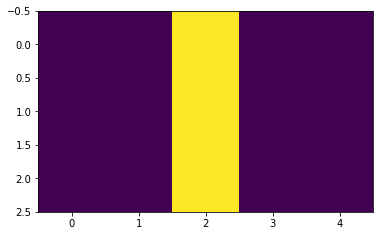

In [53]:
for t in range(number_of_time_steps):
  universe.ufuture()
  plt.imshow(universe.matrix)
  plt.show()
#  universe.ufuture()
#  universe.show()

In [0]:
# Blinker
%matplotlib inline
number_of_time_steps = 20
universe = Universe(10, 10, 1, 1)
m = np.array([[0, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 0]])
universe.manualseed(m)
universe.show()
universe.ufuture()
universe.show()

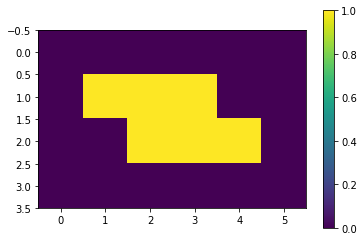

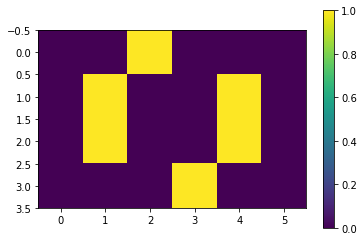

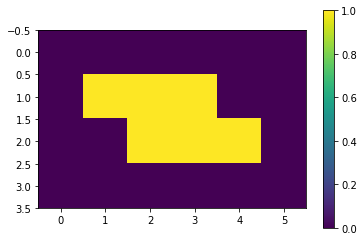

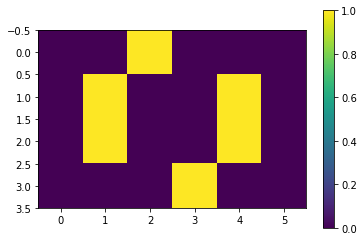

In [56]:
# Toad
%matplotlib inline
number_of_time_steps = 20
universe = Universe(10, 10, 1, 1)
m = np.array([[0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0], [0, 0, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0]])
universe.manualseed(m)
universe.show()
universe.ufuture()
universe.show()
universe.ufuture()
universe.show()
universe.ufuture()
universe.show()

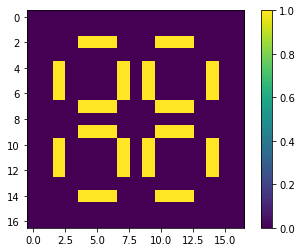

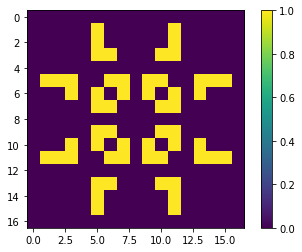

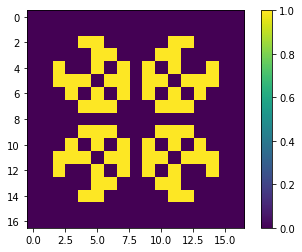

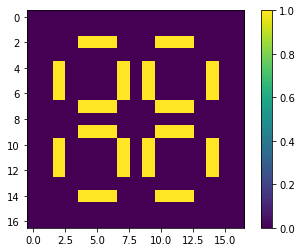

In [57]:
# The pulsar
%matplotlib inline
X = np.zeros((17, 17))
X[2, 4:7] = 1
X[4:7, 7] = 1
X += X.T
X += X[:, ::-1]
X += X[::-1, :]
number_of_time_steps = 20
universe = Universe(10, 10, 1, 1)
universe.manualseed(X)
universe.show()
universe.ufuture()
universe.show()
universe.ufuture()
universe.show()
universe.ufuture()
universe.show()

In [0]:
# Unbounded Growth
unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]
X = np.zeros((30, 40))
X[15:20, 18:23] = unbounded
number_of_time_steps = 20
universe = Universe(10, 10, 1, 1)
universe.manualseed(X)